# Introduction

If you were to generate an image for every possible arrangement of pixels, then you would have every single image that has ever been created, _or ever will_.

Could you dig out images from the past?

_From the future?_

Could you find people who never existed?

_Could you find yourself?_

# A working model

In this model, each pixel contains a single integer value which denotes its color.

For example, an 2x2 image with 2 colors may look like this:

    00
    00

There are 16 possible permutations for this image, the other 15 are:

    10  01  11  00  10  01  11  00  10  01  11  00  10  01  11
    00  00  00  10  10  10  10  01  01  01  01  11  11  11  11

The sequence is created logically and sequentially by incrementing each pixel through all of its color values and then resetting it to zero and incrementing its next neighbour, until all pixels are equal to the maximum color value, as demonstrated by the following code:

In [1]:
image = [0] * 2*2
index = 0

print("{:<2} = {}".format(index, image))

while image[-1] != 1 or image.count(image[0]) != len(image):
    index += 1

    image[0] += 1

    for i in range(0, len(image)):
        if image[i] > 1:
            image[i] = 0

            if i < len(image):
                image[i+1] += 1

    print("{:<2} = {}".format(index, image))

0  = [0, 0, 0, 0]
1  = [1, 0, 0, 0]
2  = [0, 1, 0, 0]
3  = [1, 1, 0, 0]
4  = [0, 0, 1, 0]
5  = [1, 0, 1, 0]
6  = [0, 1, 1, 0]
7  = [1, 1, 1, 0]
8  = [0, 0, 0, 1]
9  = [1, 0, 0, 1]
10 = [0, 1, 0, 1]
11 = [1, 1, 0, 1]
12 = [0, 0, 1, 1]
13 = [1, 0, 1, 1]
14 = [0, 1, 1, 1]
15 = [1, 1, 1, 1]


# Calculating permutations

Where $c$ is the maximum number of colors and $p$ is the total number of pixels, $p$ pixels can have $c$ possible values that can be combined with each value of each other pixel in the image, or $c^{p}$.

In [2]:
for i in range(1, 5):
    print("{}x{} => {}".format(i, i, 2 ** (i*i)))

1x1 => 2
2x2 => 16
3x3 => 512
4x4 => 65536


# Generating pixel data

If you look at the sequence of permutations above you'll notice that the first pixel increments every iteration, but the second pixel increments only when the first pixel has completed its cycle and reset to zero and so it takes two iterations to change value. The third pixel increments only when the _second_ pixel has completed its cycle and reset to zero and so it takes _four_ iterations to change value.

So where $i$ is the index position of a given pixel and $c$ is the maximum number of colors, the rate at which a pixel increments is determined by $c^{i}$.

In [3]:
for i in range(0, 4):
    print("{} => {}".format(i, 2**i))

0 => 1
1 => 2
2 => 4
3 => 8


So where $p$ is the index of the iteration in the sequence and $c$ is the maximum number of colors, the value of the pixel at index position $i$ can be determined by the integer value of $int(\frac{p}{c^{i}}) mod c$.

We can test this out by calculating the values of the 6th iteration of our 2x2 example (1010):

In [4]:
for i in range(0, 4):
    print(int(5 / (2 ** i)) % 2)

1
0
1
0


# Generating image data

We can test these out by grabbing the permutations from our 2x2 example:

In [5]:
for i in range(0, 16):
    print(list(map(lambda j: int(i / (2 ** j)) % 2, range(0, 2*2))))

[0, 0, 0, 0]
[1, 0, 0, 0]
[0, 1, 0, 0]
[1, 1, 0, 0]
[0, 0, 1, 0]
[1, 0, 1, 0]
[0, 1, 1, 0]
[1, 1, 1, 0]
[0, 0, 0, 1]
[1, 0, 0, 1]
[0, 1, 0, 1]
[1, 1, 0, 1]
[0, 0, 1, 1]
[1, 0, 1, 1]
[0, 1, 1, 1]
[1, 1, 1, 1]


# Putting it all together

Here's a simple image generator based on the code so far:

In [6]:
from PIL import Image
from random import randrange


class ImageGenerator:
    def __init__(self, size, colors):
        self.size = size
        self.colors = colors

    def permutations(self):
        return self.colors ** (self.size * self.size)

    def generate(self, index):
        image = Image.new("RGB", (self.size, self.size))

        for y in range(0, self.size):
            for x in range(0, self.size):
                pixel = ((y * self.size) + x)
                value = int(index / (self.colors ** pixel)) % self.colors
                color = int((255 / self.colors) * value)

                image.putpixel((x, y), (color, color, color))

        return image

    def random(self):
        return self.generate(randrange(0, self.permutations()))

And a couple of helper methods to clean up some of the code:

In [7]:
def display_image(image, size=32):
    display(image.resize((size, size), 0))

And make multiple images print out all nice and pretty:

In [8]:
def display_images(images, size=32, gap=16):
    res = Image.new('RGBA', (0, 0))

    for i in range(0, len(images)):
        img = Image.new('RGBA', (res.width + size + gap, size))
        img.paste(res)
        img.paste(images[i].resize((size, size), 0),
                  ((size * i) + (gap * i), 0))

        res = img

    display(res)

## Examples

And now we can try generating some _actual_ images..

### All permutations of 2x2

In [9]:
gen2x2 = ImageGenerator(2, 2)

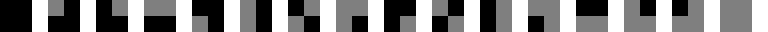

In [10]:
display_images(
    list(map(lambda i: gen2x2.generate(i), range(0, gen2x2.permutations())))
)

### All permutations of 3x3

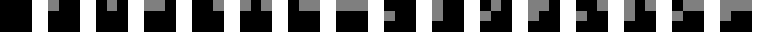

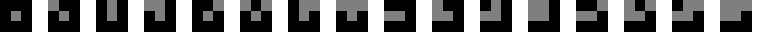

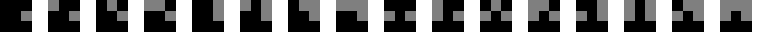

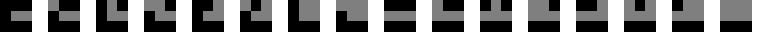

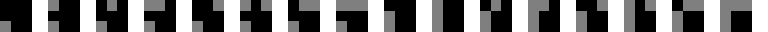

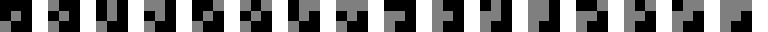

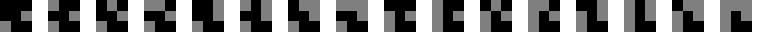

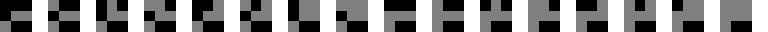

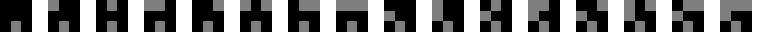

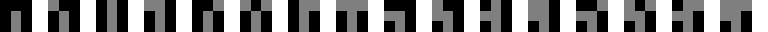

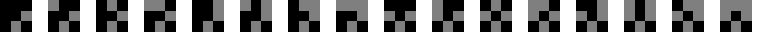

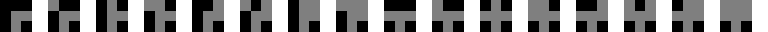

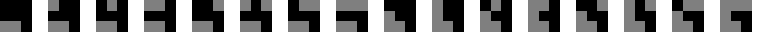

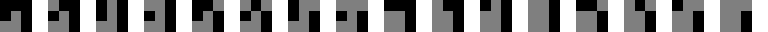

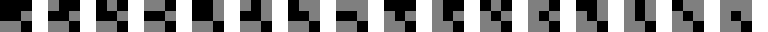

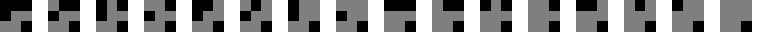

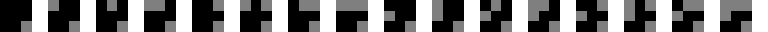

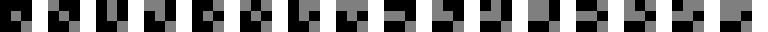

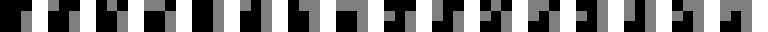

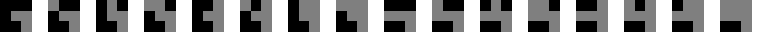

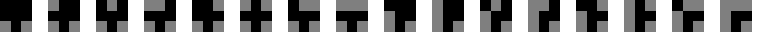

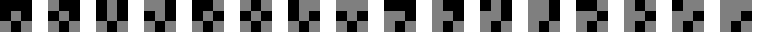

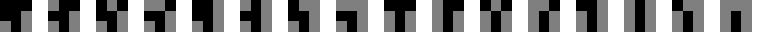

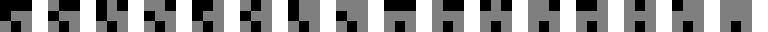

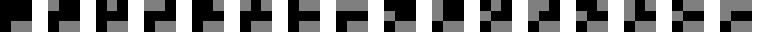

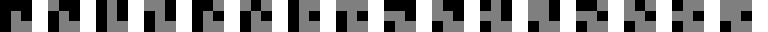

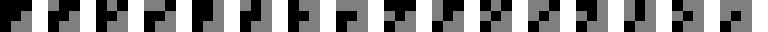

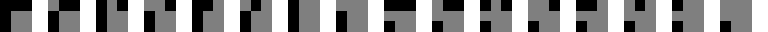

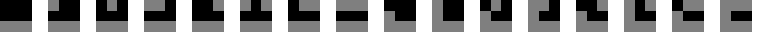

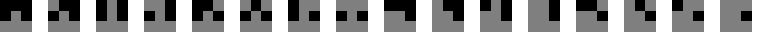

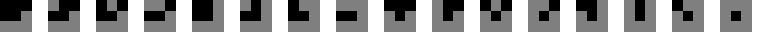

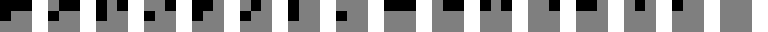

In [11]:
gen3x3 = ImageGenerator(3, 2)

for i in range(0, gen3x3.permutations(), 16):
    display_images(list(map(lambda i: gen3x3.generate(i), range(i, i + 16))))

### Random 8x8

In [12]:
gen8x8 = ImageGenerator(8, 2)

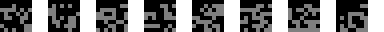

In [13]:
display_images([
    gen8x8.random(),
    gen8x8.random(),
    gen8x8.random(),
    gen8x8.random(),
    gen8x8.random(),
    gen8x8.random(),
    gen8x8.random(),
    gen8x8.random()
])

Some images from some way through the iterations for illustration purposes:

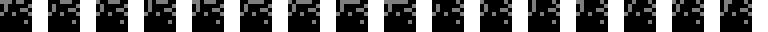

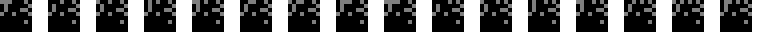

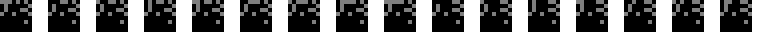

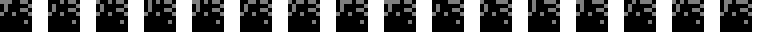

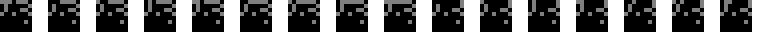

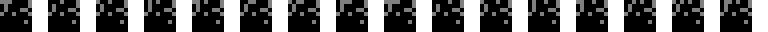

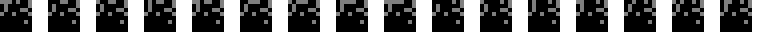

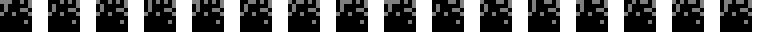

In [14]:
iter_start = int(2 ** 46) + 2304934455
iter_end = iter_start + 128

for i in range(iter_start, iter_end, 16):
    display_images(list(map(lambda i: gen8x8.generate(i), range(i, i + 16))))

# The problem

Things start to go awry as you increase the size and color depth of the image.

A tiny image of just 32x32 pixels and 8 colors has an incredible number of permutations:

In [15]:
8 ** (32 * 32)

5809605995369958062859502533304574370686975176362895236661486152287203730997110225737336044533118407251326157754980517443990529594540047121662885672187032401032111639706440498844049850989051627200244765807041812394729680540024104827976584369381522292361208779044769892743225751738076979568811309579125511333093243519553784816306381580161860200247492568448150242515304449577187604136428738580990172551573934146255830366405915000869643732053218566832545291107903722831634138599586406690325959725187447169059540805012310209639011750748760017095360734234945757416272994856013308616958529958304677637019181594088528345061285863898271763457294883546638879554311615446446330199254382340016292057090751175533888161918987295591531536698701292267685465517437915790823154844634780260102891718032495396075041899485513811126977307478969074857043710716150121315922024556759241239013152919710956468406379442914941614357107914462567329693696

Even at 128x128 with 8 colors the number of permutations is astronomical, and we'd need to go a lot higher than that.

# The goal

Ideally we want to be able to generate images of _at least_ 256x256 pixels with 256 colors, but preferably as high as 512x512 with 512 colors. Try changing some of the variables in the example image generation code above and see what happens.

The puzzle is simply to devise a way to allow _all_ permutations to be referenced and generated by an index.

# Reducing the numbers

Many iterations are similar enough that we may be able to reduce the number of images that _need_ to be accessed.

## Inverted permutations

For example each end of the sequence of permutations is identical but inverted, so we could immediately halve the number of indexes that need to be accessed. Where $i$ is the permutation index and $p$ is the total number of permutations, every permutation with an index lower than half of the total number of permutation has an inverted version at $p-i$ as demonstrated below:

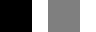

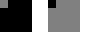

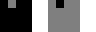

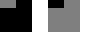

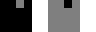

In [16]:
gen4x4 = ImageGenerator(4, 2)

for i in range(0, 5):
    display_images([
        gen4x4.generate(i),
        gen4x4.generate(gen4x4.permutations() - i - 1)
    ])

## Rotated permutations

And others will be rotated:


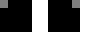

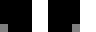

In [17]:
display_images([
    gen4x4.generate(1),
    gen4x4.generate(8)
])

display_images([
    gen4x4.generate(4096),
    gen4x4.generate(32768)
])

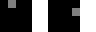

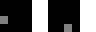

In [18]:
display_images([
    gen4x4.generate(2),
    gen4x4.generate(128)
])

display_images([
    gen4x4.generate(256),
    gen4x4.generate(16384)
])

## Flipped permutations

And others will be flipped:

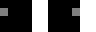

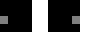

In [19]:
display_images([
    gen4x4.generate(16),
    gen4x4.generate(128)
])

display_images([
    gen4x4.generate(256),
    gen4x4.generate(2048)
])

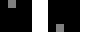

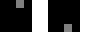

In [20]:
display_images([
    gen4x4.generate(2),
    gen4x4.generate(8192)
])

display_images([
    gen4x4.generate(4),
    gen4x4.generate(16384)
])

## Other patterns

There are other things that may prove to be useful, such as characteristics in the numbers that repeat or otherwise show some kind of pattern.

For example, every step by a power of 2 is a single pixel:

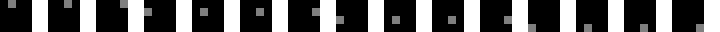

In [21]:
display_images([
    gen4x4.generate(2),
    gen4x4.generate(4),
    gen4x4.generate(8),
    gen4x4.generate(16),
    gen4x4.generate(32),
    gen4x4.generate(64),
    gen4x4.generate(128),
    gen4x4.generate(256),
    gen4x4.generate(512),
    gen4x4.generate(1024),
    gen4x4.generate(2048),
    gen4x4.generate(4096),
    gen4x4.generate(8192),
    gen4x4.generate(16384),
    gen4x4.generate(32768)
])

## A different algorithm

It may also be possible to simplify the problem by using a different algorithm to generate the permutations in the first place, perhaps something with a more even distribution of "key" iterations that can be used to reduce the numbers.

# Compressing the index

There may be ways to reduce the _apparent_ size of the indexes to make them easier to move around (and copy and paste, and use in http requests, etc). This won't affect the actual size of the numbers for the calculations, though.

For example, could we use a different numbering system? Decimal has 10 digits from 0-9, but how about using 62 from 0-9, a-z and A-Z? I'd be curious to see what that looks like.